<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

### <center>Prediction of Customer Satisfaction Based on Flight Travel History</center>
<img style="width:90%; height:400px" src="https://bestinau.com.au/wp-content/uploads/2020/06/a-photo-of-island-reef-of-a-surrounding-lagoon-3601450.jpg"/>

## Table of Contents

1. [Problem Statement](#section1)
2. [Import Packages](#section2)
3. [Load Dataset](#section3)
4. [Data Preprocessing](#section4)
    - 4.1 [Data Preprofiling](#section401)
    - 4.2 [Data Normalization](#section402)
    - 4.3 [Feauture Selection](#section403)
    - 4.4 [Feature scaling](#section403)
5. [Logistic Regression](#section5)
    - 5.1 [Preparing X and y variable](#section501)
    - 5.2 [Splitting X and y into training and test dataset](#section502)
    - 5.3 [Train the model](#section503)
    - 5.4 [Model Prediction](#section504)
6. [Model Evaluation- Logistic Regression](#section6)
    - 6.1 [Model Evaluation using sccuracy score](#section601)
    - 6.2 [Model evaulation using confusin matrixl](#section602)
7. [Decision Tree](#section7)
    - 7.1 [Preparing X and y variable](#section701)
    - 7.2 [Splitting X and y into training and test datase](#section702)
    - 7.3 [Train the model](#section703)
    - 7.4 [Model Prediction](#section704)
8. [Model Evaluation-  Decision Tree](#section8)
    - 8.1 [Model Evaluation using sccuracy score](#section801)
    - 8.2 [Model evaulation using confusin matrixl](#section802)
    

<a id="section1"></a>
### 1. Problem Statement

* Identify weather a customer is __Satisfy__ or __Unsatify__ based on the flight travel history. As we can see this problem a __Clasification Problem__.

* So we have apply clasification machine learning algo like __Logistic Regression__, __Decision Tree__ and __Random Forest__.


<a id="section2"></a>
### 2. Import Packages

In [1]:
# import python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


<a id="section3"></a>
### 3. Load Dataset

In [2]:
# import the dataset
customer_df = pd.read_csv("predicting_customer_satisfaction.csv")
customer_df.head()


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


* The dataset consist information of customer borading and deboarding information and the services provided during the travel in flight.
* Dataset has __103904 Observation__ and __24 columns__. Below is the name of the column and their description.

<a id="section4"></a>
## 4. Data Preprocessing

<a id="section401"></a>
#### 4.1 Data Preprofiling


In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
id                                   103904 non-null int64
Gender                               103904 non-null object
Customer Type                        103904 non-null object
Age                                  103904 non-null int64
Type of Travel                       103904 non-null object
Class                                103904 non-null object
Flight Distance                      103904 non-null int64
Inflight wifi service                103904 non-null int64
Departure/Arrival time convenient    103904 non-null int64
Ease of Online booking               103904 non-null int64
Gate location                        103904 non-null int64
Food and drink                       103904 non-null int64
Online boarding                      103904 non-null int64
Seat comfort                         103904 non-null int64
Inflight entertainment               103904 non-null int64


* __observation__
    - In the dataframe __5 Categorical__ and __19 Numerical Columns__.
    - there are some missing values in __Arrival Delay in Minutes__ colunms.

In [4]:
customer_df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


* __Observation__
 - Most of the columns in which rating is between 0-5.
 - Flight distnace distance can not be 31 Miles. So looking an outlier in __Flight Distance__ column.

In [5]:
from pandas_profiling import ProfileReport  

In [6]:
# profile = pandas_profiling.ProfileReport(mh)
# profile = ProfileReport(customer_df, title='Pandas Profiling Report of Customer Travel', minimal=True)
# profile.to_file("customer_pre_profiling.html")


<img src="./overview_preprofiling.PNG"/>
<img src="./warning_proprofiling.PNG"/>

#### Observation
- Total 103094 obsservation and 24 variables
- No duplicate rows exist in the dataset

- There are 301 missing cells in the dataframe
- Zero value can be possible in columns __Inflight wifi service__, __Departure/Arrival time convenient__, __Ease of Online booking__ and __Online boarding__ because these columns contain __rating between 0-5__. Apart form this Zero value can also exist in __Departure Delay in Minutes__ and __Arrival Delay in Minutes__ column. We are assuming There is no delay at the time of arrival and departure.
- There are few cells in __Flight Distance__ where distance is very low like 31, 56, 70. These are looking outlier.


<a id="section402"></a>
#### 4.2 Data Normalization

__Standardize all columns name to lower case__

In [7]:
customer_df.columns = map(str.lower, customer_df.columns)   

In [8]:
customer_df.columns

Index(['id', 'gender', 'customer type', 'age', 'type of travel', 'class',
       'flight distance', 'inflight wifi service',
       'departure/arrival time convenient', 'ease of online booking',
       'gate location', 'food and drink', 'online boarding', 'seat comfort',
       'inflight entertainment', 'on-board service', 'leg room service',
       'baggage handling', 'checkin service', 'inflight service',
       'cleanliness', 'departure delay in minutes', 'arrival delay in minutes',
       'satisfaction'],
      dtype='object')

In [9]:
dct = {"customer type": "customer_type",
       "type of travel": "travel_type",
       "flight distance": "flight_distance",
       "inflight wifi service": "inflight_wifi_service",
       "departure/arrival time convenient": "departure_arrival_time_convenient",
       "ease of online booking": "ease-of_online_booking",
       "gate location": "gate_location",
       "food and drink": "food_and_drink",
       "online boarding": "online_boarding",
       "seat comfort": "seat_comfort",
       "inflight entertainment": "inflight_entertainment_rating",
       "on-board service": "on_board_service",
       "leg room service": "leg_room_service",
      "baggage handling": "baggage_handling",
      "checkin service": "checkin_service",
      "inflight service": "inflight_service",
      "departure delay in minutes": "departure_delay_in_minutes",
      "arrival delay in minutes": "arrival_delay_in_minutes"}
customer_df.rename(columns=dct, inplace=True)

In [10]:
customer_df.head()

,id,gender,customer_type,age,travel_type,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease-of_online_booking,...,inflight_entertainment_rating,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


__Handling missing values__

In [11]:
customer_df.isnull().sum().sort_values(ascending=False)

arrival_delay_in_minutes             310
satisfaction                           0
gender                                 0
customer_type                          0
age                                    0
travel_type                            0
class                                  0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease-of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment_rating          0
on_board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
id                                     0
dtype: int64

__observation__
* There is only column __arrival_delay_in_minutes__ has missing values. As it's a continuous variable Let's replace the null values with __median__.

In [12]:
# replacing missing values with median
customer_df.arrival_delay_in_minutes = customer_df.arrival_delay_in_minutes.fillna(customer_df.arrival_delay_in_minutes.median())


__Perform Encoding__

In [13]:
# Perform encoding on categorical variables
from sklearn.preprocessing import LabelEncoder                                    # Label encoder is used to transform non-numerical labels to numerical labels.
le = LabelEncoder()


In [14]:
# making copy of main dataframe
customer_df_le = customer_df.copy()

In [15]:
customer_df_le.gender = le.fit_transform(customer_df_le.gender)
customer_df_le.travel_type = le.fit_transform(customer_df_le.travel_type)
customer_df_le["class"] = le.fit_transform(customer_df_le["class"])
customer_df_le.satisfaction = le.fit_transform(customer_df_le.satisfaction)
customer_df_le.customer_type = le.fit_transform(customer_df_le.customer_type)
customer_df_le.head()

,id,gender,customer_type,age,travel_type,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease-of_online_booking,...,inflight_entertainment_rating,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,1,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,0,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,0,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,1,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


__Observation__
 - Now all categorical feature are converted into numerical __after encoding__.

__Remove unnecessary Column__
- __id__ column is not playing any important role os let's drop this column

In [16]:
# Dropping id column
customer_df_le.drop("id", axis=1, inplace=True)
customer_df_le.columns

Index(['gender', 'customer_type', 'age', 'travel_type', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease-of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment_rating', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

<a id="section403"></a>
#### 4.3 Feature Selection
- Select the best feature to get the best score

In [17]:
corr = customer_df_le.corr()

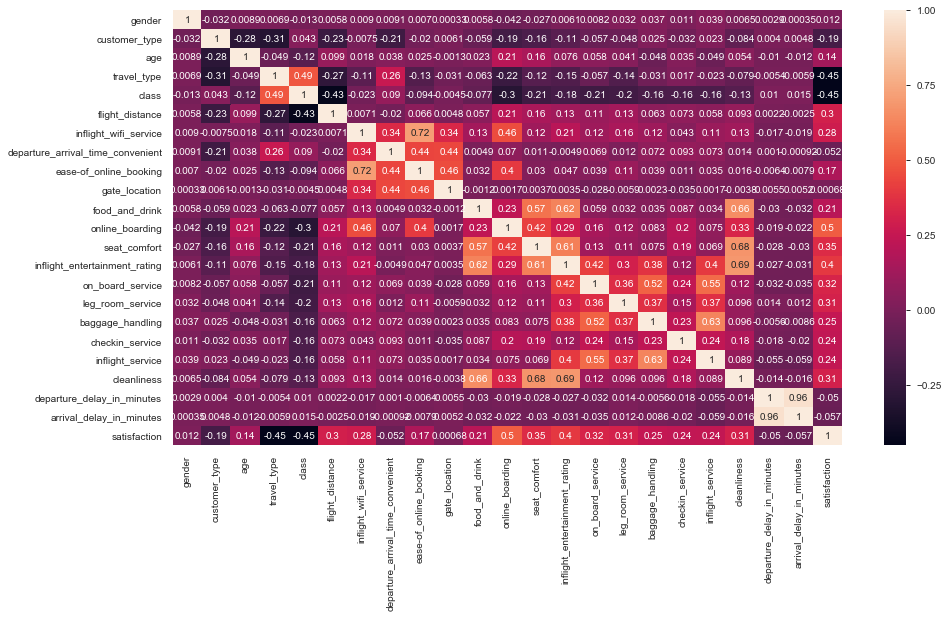

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

__Feauture Selection using SelectKBest and chi2__

In [19]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

* Creating an array of dataframe values

In [20]:
array = customer_df_le.values

- **Splitting** the data into a **feature matrix**, **X** and **target variable**, **Y**.

In [21]:
x = array[:, 0:22]
y = array[:, 22]

- Using `SelectKBest` to select the **4** best features.

- We will be applying the **ch2 method** .

In [22]:
# Feature Etraction
test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(x,y)

In [23]:
# summarize score
np.set_printoptions(precision=3)
print(fit.scores_)

[7.862e+00 2.990e+03 1.134e+04 1.445e+04 1.361e+04 7.754e+06 5.422e+03
 2.103e+02 2.175e+03 2.650e-02 2.528e+03 1.476e+04 6.419e+03 8.711e+03
 5.299e+03 5.262e+03 2.449e+03 2.808e+03 2.363e+03 5.071e+03 2.613e+04
 3.383e+04]


In [24]:
# Creating a list of feature names
feature_names = customer_df_le.iloc[:, 0:22].columns


In [25]:
# Checking the scores of various features.
# Sorting the scores by descending order (lowest scores at the bottom).

for score, name in sorted(zip(fit.scores_, feature_names), reverse=True):
    print('__Feature Score of__', name, ':', score)

__Feature Score of__ flight_distance : 7753602.4761139825
__Feature Score of__ arrival_delay_in_minutes : 33833.258258029244
__Feature Score of__ departure_delay_in_minutes : 26134.88136791237
__Feature Score of__ online_boarding : 14761.957220919898
__Feature Score of__ travel_type : 14445.748600751342
__Feature Score of__ class : 13606.876335983929
__Feature Score of__ age : 11341.514264279765
__Feature Score of__ inflight_entertainment_rating : 8711.181948218851
__Feature Score of__ seat_comfort : 6419.260323589933
__Feature Score of__ inflight_wifi_service : 5422.333982084306
__Feature Score of__ on_board_service : 5299.337351720167
__Feature Score of__ leg_room_service : 5261.976617278741
__Feature Score of__ cleanliness : 5071.376389378773
__Feature Score of__ customer_type : 2989.976064191338
__Feature Score of__ checkin_service : 2808.4447588643807
__Feature Score of__ food_and_drink : 2527.9132332759054
__Feature Score of__ baggage_handling : 2448.815382817632
__Feature Score 

__Observation__
- The score of __gate_location__, __gender__ and __departure_arrival_time_convenient__ is very low.
- Let's drop these three columns.

In [26]:
customer_df_le.head()

,gender,customer_type,age,travel_type,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease-of_online_booking,gate_location,...,inflight_entertainment_rating,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [27]:
# Drop columns that are less correlated with output variable
customer_df_le.drop(["departure_arrival_time_convenient", "gender", "gate_location"], axis=1, inplace=True)

<a id="section404"></a>
#### 4.4  Feature Scaling using Standard Scaler

In [28]:
from sklearn.preprocessing import StandardScaler

- **Creating** the **StandardScaler** object and **fitting** it on our dataframe.

In [29]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(customer_df_le[["age", "flight_distance", "departure_delay_in_minutes", "arrival_delay_in_minutes"]])


In [30]:
scaled_df = pd.DataFrame(scaled_df, columns=["age", "flight_distance", "departure_delay_in_minutes", "arrival_delay_in_minutes"])

In [31]:
# Replace standardize columns in main dataframe
customer_df_le["age"] = scaled_df["age"]
customer_df_le["flight_distance"] = scaled_df["flight_distance"]
customer_df_le["departure_delay_in_minutes"] = scaled_df["departure_delay_in_minutes"]
customer_df_le["arrival_delay_in_minutes"] = scaled_df["arrival_delay_in_minutes"]

In [32]:
scaled_df.head()

,age,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes
0,-1.745279,-0.731539,0.266393,0.074169
1,-0.951360,-0.957184,-0.361375,-0.236313
2,-0.885200,-0.047584,-0.387532,-0.391554
3,-0.951360,-0.629246,-0.099805,-0.158692
4,1.430397,-0.978244,-0.387532,-0.391554


<a id="section5"></a>
## 5. Decision Tree

<a id="section5.1"></a>
#### 5.1 Preparing X and y variable

In [33]:
# Split independent features and dependent features
x = customer_df_le.drop('satisfaction', axis=1)
x.head()

,customer_type,age,travel_type,class,flight_distance,inflight_wifi_service,ease-of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment_rating,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,0,-1.745279,1,2,-0.731539,3,3,5,3,5,5,4,3,4,4,5,5,0.266393,0.074169
1,1,-0.951360,0,0,-0.957184,3,3,1,3,1,1,1,5,3,1,4,1,-0.361375,-0.236313
2,0,-0.885200,0,0,-0.047584,2,2,5,5,5,5,4,3,4,4,4,5,-0.387532,-0.391554
3,0,-0.951360,0,0,-0.629246,2,5,2,2,2,2,2,5,3,1,4,2,-0.099805,-0.158692
4,0,1.430397,0,0,-0.978244,3,3,4,5,5,3,3,4,4,3,3,3,-0.387532,-0.391554


In [34]:
# depentdent feature
y = customer_df_le.satisfaction


<a id="section502"></a>
#### 5.2 Splitting X and y into training and test dataset

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Split data into train and test size
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [37]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(83123, 19)
(83123,)
(20781, 19)
(20781,)


<a id="section503"></a>
#### 5.3 Train the model

In [38]:
# loading package 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

<a id="section504"></a>
#### 5.4 Model Prediction

In [39]:
y_pred_train = logreg.predict(x_train)
y_pred_test = logreg.predict(x_test)

<a id="section6"></a>
## 6. Model Evaluation- Logistic Regression

<a id="section6021"></a>
#### 6.1 Model Evaluation using accuracy score

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
print("Accuracy score of the train data is ", accuracy_score(y_train, y_pred_train))
print("Accuracy score of the test data is ", accuracy_score(y_test, y_pred_test))

Accuracy score of the train data is  0.8746195397182489
Accuracy score of the test data is  0.8759924931427746


* The accuracy of the train and test data is almost equal. It means model is an __optimal model__ to predict.

<a id="section602"></a>
#### 6.2 Model evaulation using confusin matrix

In [42]:
from sklearn.metrics import confusion_matrix
import pandas as pd

In [43]:
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ["Not Satisfied", "Satisfied"]
confusion_matrix.columns = ["Not Satisfied", "Satisfied"]
confusion_matrix

,Not Satisfied,Satisfied
Not Satisfied,10751,1124
Satisfied,1453,7453


As we can see 10751 + 7453 = __18204 correct prediction__ and 1453 + 1124 = __2577 false prediction__.

* __Adjusting Threshold__ for predicting satisfied and unsatisfied

#### Setting the threshold to __0.75__

In [44]:
# Check accuracy score with threshold with .75
logreg.predict_proba(x_test)

array([[0.021, 0.979],
       [0.934, 0.066],
       [0.944, 0.056],
       ...,
       [0.241, 0.759],
       [0.811, 0.189],
       [0.066, 0.934]])

In [45]:
pred1 = np.where(logreg.predict_proba(x_test)[:,1]> 0.75,1,0)

In [46]:
print("Accurancy score for the test is:", accuracy_score(y_test, pred1))

Accurancy score for the test is: 0.858043405033444


* The accuracy has been reduced from __0.87 to .085__. Hence __0.75 is not a good model__

In [47]:
# Check accuracy score with threshold with .25
pred2 = np.where(logreg.predict_proba(x_test)[:, 1]>.25, 1, 0)

In [48]:
print("Accurancy score for the test is:", accuracy_score(y_test, pred2))

Accurancy score for the test is: 0.8235407343246235


* The accuracy has been reduced from __0.87 to .082__. Hence __0.25 is not a good model__

<a id="section7"></a>
## 7. Decision Tree

* 

<a id="section7021"></a>
#### 7.1 Preparing X and y variable

In [50]:
from sklearn.model_selection import train_test_split

In [51]:

# Split independent features and dependent features
x = customer_df_le.drop('satisfaction', axis=1)
x.head()

,customer_type,age,travel_type,class,flight_distance,inflight_wifi_service,ease-of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment_rating,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,0,-1.745279,1,2,-0.731539,3,3,5,3,5,5,4,3,4,4,5,5,0.266393,0.074169
1,1,-0.951360,0,0,-0.957184,3,3,1,3,1,1,1,5,3,1,4,1,-0.361375,-0.236313
2,0,-0.885200,0,0,-0.047584,2,2,5,5,5,5,4,3,4,4,4,5,-0.387532,-0.391554
3,0,-0.951360,0,0,-0.629246,2,5,2,2,2,2,2,5,3,1,4,2,-0.099805,-0.158692
4,0,1.430397,0,0,-0.978244,3,3,4,5,5,3,3,4,4,3,3,3,-0.387532,-0.391554


In [53]:
# depentdent feature
y = customer_df_le.satisfaction

<a id="section702"></a>
#### 7.2 Splitting X and y into training and test dataset

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# Split data into train and test size
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [56]:
print(x_train.shape)
print(y_train.shape)

(83123, 19)
(83123,)


<a id="section703"></a>
#### 7.3 Train the model

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [62]:
dtc_model = DecisionTreeClassifier(criterion='gini')
dtc_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [65]:
x_test.head()

,customer_type,age,travel_type,class,flight_distance,inflight_wifi_service,ease-of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment_rating,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
65830,0,0.107199,0,1,-0.888989,5,3,5,5,5,5,4,3,3,5,5,5,-0.387532,-0.391554
41026,0,-1.414480,0,0,-0.800736,1,5,1,1,1,1,4,3,3,1,4,1,0.057137,0.048296
95867,0,-1.745279,1,2,-0.622226,2,2,1,2,1,1,5,4,4,5,5,1,-0.387532,-0.391554
75679,1,-1.083680,0,1,-1.083545,1,1,3,1,1,3,2,5,5,3,1,3,-0.387532,-0.391554
52958,0,-1.083680,1,0,-1.109619,4,0,5,0,5,5,3,5,4,3,5,5,-0.387532,-0.391554


<a id="section704"></a>
#### 7.4 Model Prediction

In [63]:
y_pread_train = dtc_model.predict(x_train)
y_pred_test = dtc_model.predict(x_test)

Accuracy score for train data is: 1.0
Accuracy score for test data is: 0.9457196477551609


<a id="section704"></a>
## 8. Model Evaluation - Decision Tree

<a id="section801"></a>
#### 8.1 Model Evaluation using accuracy_score

In [ ]:
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train))
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

In [ ]:
* Model is underfitting but accuracy is awesome of the model.

<a id="section804"></a>
#### 8.2 Model Evaluation using confusion matrix

In [75]:
from sklearn.metrics import confusion_matrix
import pandas as pd

In [76]:
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.columns = ['Predicted Unsatisfied', 'Predicted Satisfied']
confusion_matrix.index = ['Actual Unsatisfied', 'Actual Satisfied']
print(confusion_matrix)

                    Predicted Unsatisfied  Predicted Satisfied
Actual Unsatisfied                  11298                  577
Actual Satisfied                      551                 8355


This means 11298 + 8355 = __19653 correct predictions__ & 557 + 551 = __11 08false predictions__.

### 8. Decision Tree with Gridsearch